
```
SAI DISHA .D,231057026 number of rows=7,number of columns=9,terminal states=[(1,2)],holes=[(2,4)],dummy states=[(2,3),(3,1),(3,3)]
```



In [19]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [20]:
class GridWorldEnv:
  def __init__(self, N = 7, M = 9):
    # States of a gridworld
    self.N = N
    self.M = M

    # state space
    self.observation_space = list(itertools.product(range(self.N), range(self.M)))
    # action space
    self.action_space = [(0,1), (0,-1), (1,0), (-1,0)]

    self.terminal_states = [(1,2)]
    self.holes = [(2,4)]
    self.dummy_state = [(2,3),(3,1),(3,3)]

    self.reset()

  def reset(self):
    self.state = (0,0)
    self.is_terminated = False
    self.total_reward = 0

  def get_transition_probaility(self, start_state, action, end_state):
    if start_state in self.terminal_states:
      return 0

    if start_state in self.holes:
      return 0

    expected_state = tuple(np.array(start_state) + np.array(action))
    if expected_state == end_state and end_state not in self.dummy_state:
      return 1

    if expected_state not in self.observation_space and start_state == end_state:
      return 1

    if expected_state in self.dummy_state and start_state == end_state:
      return 1

    return 0

  def get_reward(self, start_state, action, end_state):
    if end_state in self.terminal_states:
      return 10
    else:
      return -1

  def step(self, action):
    if self.state in self.terminal_states:
      self.is_terminated = True
      reward = np.nan
      return self.state, reward, self.is_terminated

    current_state = self.state
    max_prob = 0
    for possible_state in self.observation_space:
      p = self.get_transition_probaility(current_state, action, possible_state)
      if p > max_prob:
        max_prob = p
        next_state = possible_state

    reward = self.get_reward(current_state, action, next_state)

    self.state = next_state
    self.total_reward += reward

    return self.state, reward, self.is_terminated


class RandomActionAgent:
  def __init__(self, env):
    self.env = env

  def policy(self):
    action = random.choices(self.env.action_space)[0]
    return

  def train(self):
    pass

In [21]:
env = GridWorldEnv()

In [22]:
env.state

(0, 0)

In [23]:
class DPAgent:
  def __init__(self, env):
    self.env = env
    self.gamma = 1

    self.v = dict(zip(self.env.observation_space, np.zeros(self.env.N*self.env.M)))
    self.is_trained = False


  def policy(self):
    if not self.is_trained:
      action = random.choices(self.env.action_space)[0]
    else:
      s = self.env.state
      max = -np.inf
      for a in self.env.action_space:
        term = 0
        for s_prime in self.env.observation_space:
          term+= self.env.get_transition_probaility(s, a, s_prime) * (self.env.get_reward(s, a, s_prime) + self.gamma * self.v[s_prime])
        if term > max:
          max = term
          action = a

    return action

  def train(self, iter_limit = 1000):

    print("performing training...")

    self.v = dict(zip(self.env.observation_space, np.zeros(self.env.N*self.env.M)))

    iter = 0
    while iter< iter_limit:
      for s in self.env.observation_space:
        max = -np.inf
        for a in self.env.action_space:
          term2 = 0
          for s_prime in self.env.observation_space:
            term2+= self.env.get_transition_probaility(s, a, s_prime) * (self.env.get_reward(s, a, s_prime) + self.gamma*self.v[s_prime])
          if term2 > max:
            max = term2
        self.v[s] = max
      iter+=1

    self.is_trained = True

    print(np.array(list(self.v.values())).reshape(self.env.N, self.env.M))

Optimal state values through value iteration

In [24]:
env = GridWorldEnv(7,9)
dp_agent = DPAgent(env)

dp_agent.train(iter_limit = 100)

env.reset()

while not env.is_terminated:
  current_state = env.state
  action =  dp_agent.policy()
  next_state, reward, is_terminated = env.step(action)
  # print(current_state, action, reward, next_state)

performing training...
[[ 8.  9. 10.  9.  8.  7.  6.  5.  4.]
 [ 9. 10.  0. 10.  9.  8.  7.  6.  5.]
 [ 8.  9. 10.  9.  0.  7.  6.  5.  4.]
 [ 7.  8.  9.  8.  5.  6.  5.  4.  3.]
 [ 6.  7.  8.  7.  6.  5.  4.  3.  2.]
 [ 5.  6.  7.  6.  5.  4.  3.  2.  1.]
 [ 4.  5.  6.  5.  4.  3.  2.  1.  0.]]


What are the average total rewards that the agent gets with training?


In [25]:
rewards = []
for i in range(10):
  env.reset()
  agent = RandomActionAgent(env)
  while not env.is_terminated:
    current_state = env.state
    action = dp_agent.policy()
    next_state, reward, is_terminated = env.step(action)
  rewards.append(env.total_reward)

print("Average total reward:", np.mean(rewards))

Average total reward: 8.0


What are the average total rewards that the agent gets without training?

In [54]:
env2 = GridWorldEnv(7,9)
dp_agent = DPAgent(env2)
while not env2.is_terminated:
 current_state = env2.state
 action = dp_agent.policy()
 next_state, reward, is_terminated = env2.step(action)
 # print(current_state, action, reward, next_state)
env2.total_reward

-6

ran above multiple times - got values like -8, 7, 2, -6 . so average would be -1.25

Create a heatmap of optimal state values

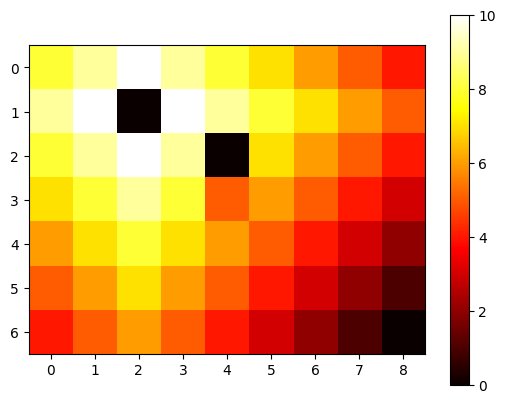

In [ ]:
v = np.array(list(dp_agent.v.values())).reshape(env.N, env.M)
plt.imshow(v, cmap='hot')
plt.colorbar()
plt.show()